
# Test twitter data from github repo

Load data from github repo

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import os
import re

import networkx as nx
import nx_altair as nxa
import altair as alt

twittercol = '#1da1f2'

# Load Corona data


In [53]:
covid_data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

covid_data["date"] = pd.to_datetime(covid_data["date"])

covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50725 entries, 0 to 50724
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         50433 non-null  object        
 1   continent                        50141 non-null  object        
 2   location                         50725 non-null  object        
 3   date                             50725 non-null  datetime64[ns]
 4   total_cases                      47077 non-null  float64       
 5   new_cases                        49861 non-null  float64       
 6   new_cases_smoothed               49077 non-null  float64       
 7   total_deaths                     38407 non-null  float64       
 8   new_deaths                       49861 non-null  float64       
 9   new_deaths_smoothed              49077 non-null  float64       
 10  total_cases_per_million          46821 non-null  float64  

In [54]:
covid_data["date"] = pd.to_datetime(covid_data["date"])

cov_selection = covid_data[["date", "total_cases", "new_cases", "new_deaths"]]

cov_selection = cov_selection.groupby('date').sum().reset_index()

start_date = '12-31-2019'
end_date = '04-07-2020'

mask = (cov_selection['date'] > start_date) & (cov_selection['date'] <= end_date)

cov_selection = cov_selection.loc[mask]

cov_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         98 non-null     datetime64[ns]
 1   total_cases  98 non-null     float64       
 2   new_cases    98 non-null     float64       
 3   new_deaths   98 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.8 KB


# Load news articles from github project

Load CNN articles from xlsx file

In [55]:
cnn_news = pd.read_excel("https://github.com/xxz-jessica/COVID-19_UCD_Challenge/blob/master/News_Fox_CNN/CNN_full.xlsx?raw=true")
cnn_news = cnn_news.dropna()

cnn_news = cnn_news.rename(columns = {"true_time": "published_date"})
cnn_news["published_date"] = pd.to_datetime(cnn_news["published_date"])

counted_news_cnn = cnn_news["published_date"].value_counts()
counted_news_cnn = counted_news_cnn.to_frame()
mask2 = (counted_news_cnn.index > start_date) & (counted_news_cnn.index <= end_date)
counted_news_cnn = counted_news_cnn.loc[mask2]

counted_news_cnn.reset_index(level=0, inplace=True)
counted_news_cnn = counted_news_cnn.rename(columns = {"index" : "date", "published_date" : "cnn_articles"})


counted_news_cnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          66 non-null     datetime64[ns]
 1   cnn_articles  66 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [56]:
fox_news = pd.read_excel("https://github.com/xxz-jessica/COVID-19_UCD_Challenge/blob/master/News_Fox_CNN/foxnews_article_form.xlsx?raw=true")

fox_news = fox_news.dropna()

fox_news = fox_news.rename(columns = {"true_time": "published_date"})

fox_news["published_date"] = pd.to_datetime(fox_news["published_date"])

counted_news_fox = fox_news["published_date"].value_counts()
counted_news_fox = counted_news_fox.to_frame()
mask3 = (counted_news_fox.index > start_date) & (counted_news_fox.index <= end_date)
counted_news_fox = counted_news_fox.loc[mask3]

counted_news_fox.reset_index(level=0, inplace=True)
counted_news_fox = counted_news_fox.rename(columns = {"index" : "date", "published_date" : "fox_articles"})


counted_news_fox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          84 non-null     datetime64[ns]
 1   fox_articles  84 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


# Visualize number of daily tweets, news articles and Covid cases from github project

In [57]:
num_tweets = pd.read_csv("https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Tweet_Raw_Data/tweet_per_day_1.csv")

num_tweets["Tweets"] = num_tweets["Tweets"].str.replace(",", "").astype(int)
num_tweets["Day"] = pd.to_datetime(num_tweets["Day"])

num_tweets = num_tweets.rename(columns = {"Day": "date"})

num_tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   Tweets  98 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.3 KB


In [58]:
#merge data
merged_3 = pd.merge(num_tweets, cov_selection).merge(counted_news_cnn, how = "outer").merge(counted_news_fox, how = "outer")
merged_3.info()

merged_3 = merged_3.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          98 non-null     datetime64[ns]
 1   Tweets        98 non-null     int32         
 2   total_cases   98 non-null     float64       
 3   new_cases     98 non-null     float64       
 4   new_deaths    98 non-null     float64       
 5   cnn_articles  66 non-null     float64       
 6   fox_articles  84 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 5.7 KB


In [8]:
base = alt.Chart(merged_3).encode(
    alt.X('date:T', axis=alt.Axis(title=None))
).properties(
    width=500,
    height=200
)


line_tweets = base.mark_line(stroke='#1da1f2', interpolate='monotone').encode(
    alt.Y('Tweets',
          axis=alt.Axis(title='Number of tweets', titleColor='#1da1f2'))
)

line_cases = base.mark_line( interpolate='monotone', stroke='#eb34eb').encode(
    alt.Y('new_cases',
          axis=alt.Axis(title='New cases', titleColor='#eb34eb'))
)

alt.layer(line_tweets, line_cases).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

In [9]:
columns = ['new_cases', 'new_deaths']

select_box = alt.binding_select(options=columns, name='Pandemic data')
sel = alt.selection_single(fields=['column'], bind=select_box, init={'column': 'new_cases'})

base = alt.Chart(merged_3).encode(
    alt.X('date:T', axis=alt.Axis(title=None))
).properties(
    width=500,
    height=200
)


line_cases = base.transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel  
).mark_line( interpolate='monotone', stroke='#eb34eb').encode(
    alt.Y('value:Q',
          axis=alt.Axis(title="value", titleColor='#eb34eb'))
).add_selection(
    sel
)

line_tweets = base.mark_line(stroke='#1da1f2', interpolate='monotone').encode(
    alt.Y('Tweets',
          axis=alt.Axis(title='Number of tweets', titleColor='#1da1f2'))
)

alt.layer(line_tweets, line_cases).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

# Compare tweet numbers to news articles on CNN and Fox News

In [10]:
columns = ['fox_articles', 'cnn_articles']

select_box = alt.binding_select(options=columns, name='News source')
sel = alt.selection_single(fields=['column'], bind=select_box, init={'column': 'cnn_articles'})

base = alt.Chart(merged_3).encode(
    alt.X('date:T', axis=alt.Axis(title=None))
).properties(
    width=500,
    height=200
)

line_articles = base.transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_line( interpolate='monotone', stroke='#eb34eb').encode(
    alt.Y('value:Q',
          axis=alt.Axis(title="value", titleColor='#eb34eb'))
).add_selection(
    sel
)

line_tweets = base.mark_line(stroke='#1da1f2', interpolate='monotone').encode(
    alt.Y('Tweets',
          axis=alt.Axis(title='Number of tweets', titleColor='#1da1f2'))
)

alt.layer(line_articles, line_tweets).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

# Load downloaded twitter raw data from Github

In [5]:

#path = r'C:/Users/rapha/DATA_VIS/twitter_project/data/raw_data/'
onlinepath = "https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Tweet_Raw_Data/raw_data/"
#files = os.listdir(path)

### filelist generated through download
files_gen = ['covid2019_0120.csv',
 'covid2019_0121.csv',
 'covid2019_0122.csv',
 'covid2019_0123.csv',
 'covid2019_0124.csv',
 'covid2019_0125.csv',
 'covid2019_0126.csv',
 'covid2019_0127.csv',
 'covid2019_0128.csv',
 'covid2019_0129.csv',
 'covid2019_0130.csv',
 'covid2019_0131.csv',
 'covid2019_0201.csv',
 'covid2019_0202.csv',
 'covid2019_0203.csv',
 'covid2019_0204.csv',
 'covid2019_0205.csv',
 'covid2019_0206.csv',
 'covid2019_0207.csv',
 'covid2019_0208.csv',
 'covid2019_0209.csv',
 'covid2019_0210.csv',
 'covid2019_0211.csv',
 'covid2019_0212.csv',
 'covid2019_0213.csv',
 'covid2019_0214.csv',
 'covid2019_0215.csv',
 'covid2019_0216.csv',
 'covid2019_0217.csv',
 'covid2019_0218.csv',
 'covid2019_0219.csv',
 'covid2019_0220.csv',
 'covid2019_0308.csv',
 'covid2019_0309.csv',
 'covid2019_0310.csv',
 'covid2019_0311.csv',
 'covid2019_0312.csv',
 'covid2019_0313.csv',
 'covid2019_0314.csv',
 'covid2019_0315.csv',
 'covid2019_0316.csv',
 'covid2019_0317.csv',
 'covid2019_0318.csv',
 'covid2019_0319.csv',
 'covid2019_0320.csv',
 'covid2019_0321.csv',
 'covid2019_0322.csv',
 'covid2019_0323.csv',
 'covid2019_0324.csv',
 'covid2019_0325.csv',
 'covid2019_0326.csv',
 'covid2019_0327.csv',
 'covid2019_0328.csv',
 'covid2019_0329.csv',
 'covid2019_0330.csv',
 'covid2019_0331.csv',
 'covid2019_0401.csv',
 'covid2019_0402.csv',
 'covid2019_0403.csv',
 'covid2019_0404.csv',
 'covid2019_0405.csv',
 'covid2019_0406.csv',
 'covid2019_0407.csv',
 'covid2019_0408.csv',
 'random tweet 2020-02-21.csv',
 'random tweet 2020-02-22.csv',
 'random tweet 2020-02-23.csv',
 'random tweet 2020-02-24.csv',
 'random tweet 2020-02-25.csv',
 'random tweet 2020-02-26.csv',
 'random tweet 2020-02-27.csv',
 'random tweet 2020-02-28.csv',
 'random tweet 2020-02-29.csv',
 'random tweet 2020-03-01.csv',
 'random tweet 2020-03-02.csv',
 'random tweet 2020-03-03.csv',
 'random tweet 2020-03-04.csv',
 'random tweet 2020-03-05.csv',
 'random tweet 2020-03-06.csv',
 'random tweet 2020-03-07.csv']

In [42]:
# run this only once, once the file is saved it can be loaded
def generate_combined(filenames = files_gen):
    # Concat the Twitters data into one-table
    covid_twitter_data = pd.DataFrame()
    for file in files_gen:
        dpath = (onlinepath + file).replace(" ", "%20")
        print(file)
        data = pd.read_csv(dpath)
        covid_twitter_data = covid_twitter_data.append(data, ignore_index=True)
        covid_twitter_data["timestamp"] = pd.to_datetime(covid_twitter_data["timestamp"])
        covid_twitter_data = covid_twitter_data.sort_values(by = ["timestamp"])
    return covid_twitter_data
    

covid2019_0120.csv
covid2019_0121.csv
covid2019_0122.csv
covid2019_0123.csv
covid2019_0124.csv
covid2019_0125.csv
covid2019_0126.csv
covid2019_0127.csv
covid2019_0128.csv
covid2019_0129.csv
covid2019_0130.csv
covid2019_0131.csv
covid2019_0201.csv
covid2019_0202.csv
covid2019_0203.csv
covid2019_0204.csv
covid2019_0205.csv
covid2019_0206.csv
covid2019_0207.csv
covid2019_0208.csv
covid2019_0209.csv
covid2019_0210.csv
covid2019_0211.csv
covid2019_0212.csv
covid2019_0213.csv
covid2019_0214.csv
covid2019_0215.csv
covid2019_0216.csv
covid2019_0217.csv
covid2019_0218.csv
covid2019_0219.csv
covid2019_0220.csv
covid2019_0308.csv
covid2019_0309.csv
covid2019_0310.csv
covid2019_0311.csv
covid2019_0312.csv
covid2019_0313.csv
covid2019_0314.csv
covid2019_0315.csv
covid2019_0316.csv
covid2019_0317.csv
covid2019_0318.csv
covid2019_0319.csv
covid2019_0320.csv
covid2019_0321.csv
covid2019_0322.csv
covid2019_0323.csv
covid2019_0324.csv
covid2019_0325.csv
covid2019_0326.csv
covid2019_0327.csv
covid2019_03

In [ ]:
if os.path.exists("all_twitter_data.csv"):
    covid_twitter_data = pd.read_csv("all_twitter_data.csv", low_memory = False)
else: 
    covid_twitter_data = generate_combined(files_gen)
    #save all twitter data in one file
    covid_twitter_data.to_csv("all_twitter_data.csv", index = False)

covid_twitter_data.info()

# Find keywords in the data

keyword_list: global list of keywords we want to search for in the data

count_keywords: function to count keywords in a tweet dataframe, best done for each day individually


In [3]:
#use singular word (if plural just adds an "s")
#for several words use space (eg. "social distancing"; "social_distancing" and "socialdistancing" automatically searched for)
#if there are different words with the same meaning that do not contain each other, use "|" (eg. "New York|NY")
#if two words should be in there but not necessarily together, use ".*" (eg. stay.*home)
#if order of two words doesnt matter use "wash.*hands|hands.*wash"
keyword_list = ["trump", "social distancing", "Wuhan", "chinese virus", "New York", "Los Angeles", "Chicago", "Washington", 
               "mask", "economy", "health care", "fauci", "death|deadly|mortality", "stay.*home", "Flatten the curve", 
               "Outbreak", "Epidemic", "Pandemic", "lockdown", "science", "China", "test", "wet market",
               "travel ban", "vaccine", "symptoms", "wash.*hands", "treatment", "isolation", "panic buying",
               "toilet paper"]

In [6]:
# keyword counter functions to count from online files
def count_keywords(keywords, tweetlist, column = "text"):
    #function takes a list of keyword and a twitter dataset and counts the number of tweets containing each keyword
    #return the keywords and the corresponding tweet counts
    #search for words is case insensitive 
    #if word contains space (social distancing) it also searches for socialdistancing and social_distancing
    date = pd.to_datetime(tweetlist["timestamp"][0]).date()
    counterdf = pd.DataFrame({'date': [date] })
    counterlist = []
    for word in keywords:
        counter = 0
        if " " in word:
            searchword = word + "|" + word.replace(" ", "_") + "|" + word.replace(" ", "")
        else:
            searchword = word
        for tweet in tweetlist[column].dropna():
            if re.search(searchword, tweet, re.IGNORECASE):
                counter = counter + 1
        counterdf[word] = counter

    return counterdf

def count_keywords_complete(path = "https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Tweet_Raw_Data/raw_data/", 
                            files_gen = files_gen,
                            keywords = keyword_list,
                            column = "text"):
    #create dataframe that gives number of tweets containing hashtag for all dates for which data is available
    countdata = pd.DataFrame()
    for file in files_gen:
        dpath = (path + file).replace(" ", "%20")
        print(file)
        data = pd.read_csv(dpath)
        countdata = countdata.append(count_keywords(keywords, data, column))
    countdata["date"] = pd.to_datetime(countdata["date"])
    countdata = countdata.sort_values(by = ["date"])
    return countdata


In [72]:
#keyword counter function tocount from big file with tweets from several dates
def count_from_all_loaded_data(twitter_data = covid_twitter_data,
                              keywords = keyword_list,
                              column = "text"):
    #function to count tweets from large preloaded file with several dates
    twitter_data["timestamp"] = pd.to_datetime(twitter_data["timestamp"]).map(lambda x: x.date())
    twitter_data = twitter_data.sort_values(by = ["timestamp"])

    dates = np.unique(twitter_data["timestamp"])
    results = pd.DataFrame(np.zeros((len(dates), len(keywords)), dtype = "int64"), columns = keywords, index = dates)
    
    for word in keywords:
        print(word)
        if " " in word:
            searchword = word + "|" + word.replace(" ", "_") + "|" + word.replace(" ", "")
        else:
            searchword = word

        for date in dates:
            datemask = (twitter_data['timestamp'] > (date - dt.timedelta(days=1))) & (twitter_data['timestamp'] <= date)
            counter = 0
            for tweet in twitter_data[datemask][column].dropna():
                if re.search(searchword, tweet, re.IGNORECASE):
                    counter = counter + 1
            results.at[date, word] = counter
    results["date"] = results.index
    return results


In [80]:
#Select how to count tweets, only run one!!!
#If no new keywords were added since last creation of file data
#Then no function needs to be run

#count the tweets while loading separate files online
"""keyword_data_old = count_keywords_complete(path = "https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Tweet_Raw_Data/raw_data/", 
                                        files_gen = files_gen,
                                        keywords = keyword_list,
                                        column = "text")"""

#count the tweets from large files with all tweets
keyword_data = count_from_all_loaded_data(twitter_data = covid_twitter_data,
                                          keywords = keyword_list,
                                          column = "text")

#save keyword data
keyword_data.to_csv("keyword_counts.csv", index = False)
keyword_data.info()


trump
social distancing
Wuhan
chinese virus
New York
Los Angeles
Chicago
Washington
mask
economy
health care
fauci
death|deadly|mortality
stay.*home
Flatten the curve
Outbreak
Epidemic
Pandemic
lockdown
science
China
test
wet market
travel ban
vaccine
symptoms
wash.*hands
treatment
isolation
panic buying
toilet paper


In [82]:
#load keyword data
keyword_data = pd.read_csv("keyword_counts.csv")
keyword_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trump                   80 non-null     int64 
 1   social distancing       80 non-null     int64 
 2   Wuhan                   80 non-null     int64 
 3   chinese virus           80 non-null     int64 
 4   New York                80 non-null     int64 
 5   Los Angeles             80 non-null     int64 
 6   Chicago                 80 non-null     int64 
 7   Washington              80 non-null     int64 
 8   mask                    80 non-null     int64 
 9   economy                 80 non-null     int64 
 10  health care             80 non-null     int64 
 11  fauci                   80 non-null     int64 
 12  death|deadly|mortality  80 non-null     int64 
 13  stay.*home              80 non-null     int64 
 14  Flatten the curve       80 non-null     int64 
 15  Outbreak

In [84]:
keyword_data["date"] = pd.to_datetime(keyword_data["date"])
key_merged = keyword_data.merge(merged_3)
key_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          98 non-null     datetime64[ns]
 1   Tweets        98 non-null     int32         
 2   total_cases   98 non-null     float64       
 3   new_cases     98 non-null     float64       
 4   new_deaths    98 non-null     float64       
 5   cnn_articles  98 non-null     float64       
 6   fox_articles  98 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 5.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trump                   79 non-null     int64         
 1   social distancing       79 non-null     int64         
 2   Wuhan                   79 non-

# Count combined appearances of keywords

In [92]:
def count_keyword_combinations(keywords = keyword_list, tweetlist = covid_twitter_data):
    #function to count which combinations of keywords appear in the tweets
    results = pd.DataFrame(np.zeros((len(keywords), len(keywords)), dtype = "int32"), columns = keywords, index = keywords)
    total_counts = pd.Series(np.zeros(len(keywords), dtype = "int32"), index = keywords)
    for word in keywords:
        print(word)
        if " " in word:
            searchword = word + "|" + word.replace(" ", "_") + "|" + word.replace(" ", "")
        else:
            searchword = word
        for tweet in tweetlist["text"].dropna():
            if re.search(searchword, tweet, re.IGNORECASE):
                total_counts[word] = total_counts[word] + 1
                for word2 in keywords:
                    if word == word2:
                        continue
                    if " " in word2:
                        searchword2 = word2 + "|" + word2.replace(" ", "_") + "|" + word2.replace(" ", "")
                    else:
                        searchword2 = word2
                    if re.search(searchword2, tweet, re.IGNORECASE):
                        results.at[word, word2] = results.at[word, word2] + 1
                        results.at[word2, word] = results.at[word2, word] + 1
    return results, total_counts

trump
social distancing
Wuhan
chinese virus
New York
Los Angeles
Chicago
Washington
mask
economy
health care
fauci
death|deadly|mortality
stay.*home
Flatten the curve
Outbreak
Epidemic
Pandemic
lockdown
science
China
test
wet market
travel ban
vaccine
symptoms
wash.*hands
treatment
isolation
panic buying
toilet paper


In [93]:
# run and save combinations only if since last creation keyword list has been changed
key_combinations, total_counts = count_keyword_combinations()  

key_combinations.to_csv("keyword_combinations.csv")
total_counts.to_csv("total_tweets_keywords.csv")

In [94]:
# load keyword combinations
key_combinations = pd.read_csv("keyword_combinations.csv", index_col = 0)
total_counts = pd.read_csv("total_tweets_keywords.csv", index_col = 0, squeeze = True)


In [95]:
G = nx.from_pandas_adjacency(key_combinations)

[elem[2] for elem in list(G.edges.data("weight"))]

for n in G.nodes():
    G.nodes[n]["name"] = str(n)
    G.nodes[n]["total tweets"] = total_counts[str(n)]

# Visualize combined appearances of keywords

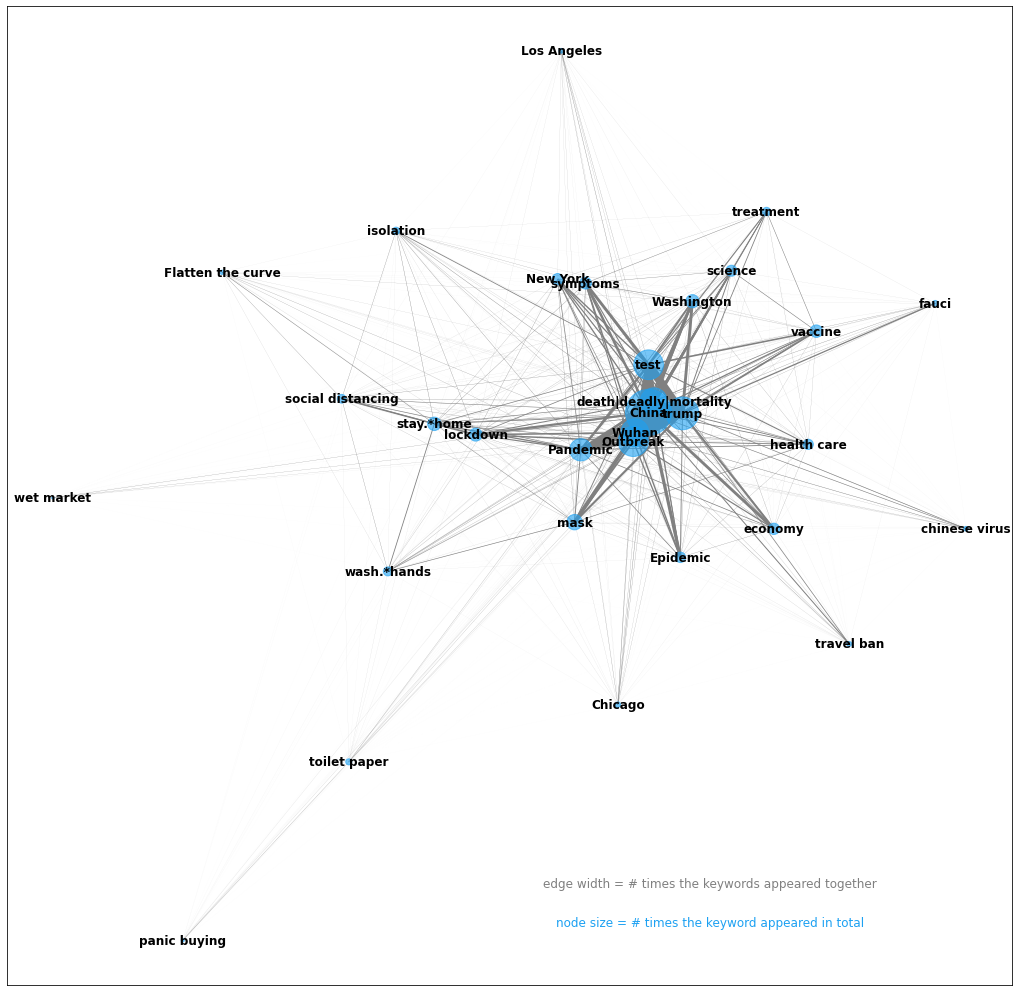

In [169]:
import matplotlib.pyplot as plt
G = nx.from_pandas_adjacency(key_combinations)
weights = [elem[2]/1000 for elem in list(G.edges.data("weight"))]
pos = nx.spring_layout(G, iterations=100)
node_labels = G.nodes()

graph, ax = plt.subplots(figsize=(18,18))

nodes = nx.draw_networkx_nodes(G, pos, node_color = twittercol, alpha = 0.6, node_size= [elem/50 for elem in list(total_counts)])
edges = nx.draw_networkx_edges(G,pos,
                    width=weights, edge_color = "grey")
labels = nx.draw_networkx_labels(G, pos, font_size=12, font_weight= "bold")

ax.text(
    0.70,
    0.10,
    "edge width = # times the keywords appeared together",
    horizontalalignment="center",
    transform=ax.transAxes,
    color = "grey",
    fontsize = 12
)
ax.text(
    0.70,
    0.06,
    "node size = # times the keyword appeared in total",
    horizontalalignment="center",
    transform=ax.transAxes,
    color = twittercol,
    fontsize = 12
)

plt.show()

In [99]:
# attempt at using nx_altair to make it interactive
# isnt really working, because nx_altair is SHIT. Cant even draw labels

G = nx.from_pandas_adjacency(key_combinations)
pos = nx.spring_layout(G, iterations=100)
weights = [elem[2]/1000 for elem in list(G.edges.data("weight"))]

#nx.set_node_attributes(G, total_counts)
"""
nxa.draw_networkx(
    G, pos=pos,
    
    #cmap='viridis',
    width='weight',
    edge_color="black",
    node_color = twittercol,
    node_tooltip = ["name", "total tweets"]
)"""
#viz

'\nnxa.draw_networkx(\n    G, pos=pos,\n    \n    #cmap=\'viridis\',\n    width=\'weight\',\n    edge_color="black",\n    node_color = twittercol,\n    node_tooltip = ["name", "total tweets"]\n)'

# Visualize keywords over time

collect possible visualizations over time

In [146]:
keyword_data

trump  social distancing  Wuhan  chinese virus  New York  \
2020-01-20     36                  0   1310             18        56   
2020-01-21    151                  0   2138             12        91   
2020-01-22    153                  0   1989              1        17   
2020-01-23    128                  0   1536              0        25   
2020-01-24    194                  0   1305              3        65   
...           ...                ...    ...            ...       ...   
2020-04-04   1002                109     94             19       201   
2020-04-05   1394                121     74             13       222   
2020-04-06    964                124     79             21       165   
2020-04-07   1108                134    157             13       132   
2020-04-08    861                138    140             21       134   

            Los Angeles  Chicago  Washington  mask  economy  ...  wet market  \
2020-01-20           16        3          16    41       11  ...           3   
2020-01-21           17       53        1150    60       10  ...           2   
2020-01-22            3        7         105    70        6  ...           3   
2020-01-23           68        5          66   128       42  ...          14   
2020-01-24            1      211          90    98        5  ...           8   
...                 ...      ...         ...   ...      ...  ...         ...   
2020-04-04           23       23         117   265       79  ...          12   
2020-04-05           15       34         109   242       71  ...           4   
2020-04-06           20       39         109   214       84  ...           3   
2020-04-07           31       42         110   214       71  ...           7   
2020-04-08           26       47         115   221       84  ...          12   

            travel ban  vaccine  symptoms  wash.*hands  treatment  isolation  \
2020-01-20           2       24       188           19         33         11   
2020-01-21          10       78       118           57         34         25   
2020-01-22          38       78        75           17         17          6   
2020-01-23          30      130       140           34         33          6   
2020-01-24          33       80       111           29         18         32   
...                ...      ...       ...          ...        ...        ...   
2020-04-04           7      126        61           30         92         59   
2020-04-05           3      104       210           23        116         44   
2020-04-06           9      136       203           25        128         52   
2020-04-07           5       94        79           18         64         31   
2020-04-08          11       96        42           24         76         57   

            panic buying  toilet paper       date  
2020-01-20             0             0 2020-01-20  
2020-01-21             0             1 2020-01-21  
2020-01-22             0             0 2020-01-22  
2020-01-23             0             0 2020-01-23  
2020-01-24             0             0 2020-01-24  
...                  ...           ...        ...  
2020-04-04             2            11 2020-04-04  
2020-04-05             0             9 2020-04-05  
2020-04-06             4            16 2020-04-06  
2020-04-07             2             8 2020-04-07  
2020-04-08             1            12 2020-04-08  

[80 rows x 32 columns]

In [152]:
#rename two columns (not sure why that is necessary, but :-|)
key_merged.rename(columns = {'stay.*home': "stay home", 'wash.*hands': "wash hands"})

keywordz = list(keyword_data.columns)
keywordz.remove('stay.*home')
keywordz.remove('wash.*hands')
keywordz.append("stay home")
keywordz.append("wash hands")


In [153]:
columns1 = list(keywordz)[:-1]
columns2 = list(merged_3.columns)[1:]
select_box1 = alt.binding_select(options=columns1, name='Keyword')
sel1 = alt.selection_single(fields=['column'], bind=select_box1, init={'column': 'trump'})
select_box2 = alt.binding_select(options=columns2, name='Compare to value')
sel2 = alt.selection_single(fields=['column'], bind=select_box2, init={'column': 'new_cases'})


In [154]:
base = alt.Chart(key_merged).encode(
    alt.X('date:T', axis=alt.Axis(title="Date"))
).properties(
    width=500,
    height=200
)

line_tweets = base.mark_line(stroke='#1da1f2', interpolate='monotone').encode(
    alt.Y('Tweets',
          axis=alt.Axis(title='Number of tweets', titleColor='#1da1f2')
         ))


line_one = base.transform_fold(
    columns1,
    as_=['column', 'value']
).transform_filter(
    sel1
).mark_line( interpolate='monotone', stroke='#eb34eb').encode(
    alt.Y('value:Q',
          axis=alt.Axis(title="Keyword appearances", titleColor='#eb34eb'))
).add_selection(
    sel1
)

line_two = base.transform_fold(
    columns2,
    as_=['column', 'value']
).transform_filter(
    sel2
).mark_line( interpolate='monotone', stroke='#1da1f2').encode(
    alt.Y('value:Q',
          axis=alt.Axis(title="Data value", titleColor='#1da1f2'))
).add_selection(
    sel2
)

alt.layer(line_one, line_two).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

# Load data of trending topics from github

selecting the fifty most talked about trending topics on twitter

manually annotate the wider topic the trend belongs to (C: Coronavirus, P: Politics, D: Tweets related to a special day of the week/year, O: Other topics)



In [155]:
#trending = pd.read_csv("trending_topics_usa.csv")

trending = pd.read_csv("https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Twitter_Trending_Topics/usa_trending.csv", encoding='latin1')
trending["date"] = pd.to_datetime(trending["date"])

trending_counted = trending.groupby('trending')['date'].apply(list).reset_index(name='dates')
trending_counted2 = trending.groupby("trending").count().reset_index()

trending_selected = trending_counted.merge(trending_counted2).sort_values("date", ascending = False)

trending_selected = trending_selected[0:50]

trending_selected["annotation"] = ["P", "C", "O", "O", "C", "P", "P", "C", "P", "P", "D", "D", "O", "D", "D", 
                                    "D", "O", "D", "O", "P", "D", "C", "P", "D", "C", "P", "C", "P", "O", "O",
                                    "P", "P", "O", "C", "O", "O", "O", "D", "P", "O", "P", "P", "D", "C", "P", 
                                    "P", "P", "P", "D", "P"]


# Create wordcloud using brunel to visualize trending topics

In [156]:
import brunel

In [157]:
trending_selected
%brunel cloud data("trending_selected") size(date) label(trending) tooltip(dates) color(annotation)

<IPython.core.display.Javascript object>

# create wordcloud using "wordcloud" 

Visualizing most used COVID related hashtags

In [158]:
import wordcloud as wc
import matplotlib.pyplot as plt
import string
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude

In [159]:
#stupid way to create wordcloud by generating text containing number of words 
def create_text(trending_list):
    text = ""
    for i in range(0,trending_list.shape[0]):
        for j in range(0, int(trending_list.iloc[[i]]["date"])):
            text = text + " " + str(trending_list.iloc[i]["trending"])
    return text
        

In [160]:
#all hashtags

hashtags = list(covid_twitter_data["hashtags"][covid_twitter_data["hashtags"] != '[]'])


#real_hashs = [elem if elem != '[]': for elem in hashtags]

hashtags_string = "".join(hashtags).replace("[", "").replace("]", "").replace("''", " ").replace("', '", " ")


In [161]:
#shapes:
twitter_bird = "twitter_bird.jpg"
virus = "virus.jpg"
#use twitter logo as mask
# load image. This has been modified in gimp to be brighter and have more saturation.
img = np.array(Image.open(twitter_bird))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
img = img[::3, ::3]
# create mask  white is "masked out"
mask = img.copy()
mask[mask.sum(axis=2) == 0] = 255
# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(img[:, :, i] / 255., 2) for i in range(3)], axis=0)
mask[edges > .08] = 255



(-0.5, 682.5, 495.5, -0.5)

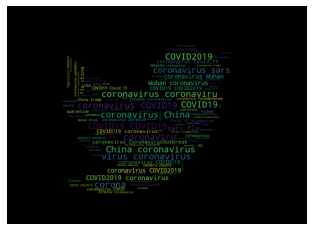

In [162]:
cloud = wc.WordCloud(max_words=2000, mask=mask, 
               max_font_size=20, random_state=42, 
               relative_scaling=0)

cloud.generate(hashtags_string)
plt.imshow(cloud)
plt.axis("off")

# look for the most shared links

In [163]:
trending_links = (covid_twitter_data["links"].value_counts())
    
trending_links = pd.DataFrame(trending_links)

links
[]                                                  564491
['https://twitter.com/i/events/1219057585707315...    2613
['https://twitter.com/messages/compose?recipien...    1185
['https://gisanddata.maps.arcgis.com/apps/opsda...     827
['http://SURGICALMASK.vuhere.com']                     541
...                                                    ...
['https://www.francetvinfo.fr/live/message/5e3/...       1
['https://globoesporte.globo.com/futebol/times/...       1
['https://metro.co.uk/2020/02/29/france-bans-pu...       1
['https://twitter.com/g_quadri/status/123341239...       1
['https://reut.rs/3dVQBoo']                              1

[399093 rows x 1 columns]